# Permise
Dlib is having trouble with values when faces are rotated, so we need to compare it's results with mat files results and investigate it in order to find best landmarks to train the model.
also be aware of how multiple faces in the picture could miss up the comparison.

In [1]:
# import data from mat
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import dlib
import glob
from math import cos, sin
import os
# from PIL import image, ImageFilter
import pandas as pd

In [2]:
# debug on a picture
img_mat = sio.loadmat('resources/300W-3D/AFW/134212_1.mat')
landmarks = img_mat['pt2d']
landmarks.shape
labels = img_mat['Pose_Para'][0][:3]
pitch, yaw, roll = labels
pitch_, yaw_, roll_ = pitch, -yaw, roll

136
[[142 250]
 [141 267]
 [142 285]
 [150 302]
 [159 318]
 [170 334]
 [181 350]
 [191 366]
 [206 374]
 [226 372]
 [248 362]
 [269 348]
 [289 330]
 [302 308]
 [309 282]
 [313 254]
 [315 226]
 [137 233]
 [143 230]
 [152 233]
 [161 237]
 [171 240]
 [199 237]
 [215 229]
 [233 224]
 [252 224]
 [270 230]
 [185 250]
 [183 265]
 [181 281]
 [179 296]
 [172 300]
 [178 305]
 [186 308]
 [196 304]
 [207 300]
 [152 251]
 [158 249]
 [166 248]
 [177 250]
 [167 253]
 [159 254]
 [216 249]
 [224 246]
 [235 247]
 [247 248]
 [235 251]
 [225 251]
 [176 319]
 [179 318]
 [185 318]
 [192 320]
 [201 318]
 [217 319]
 [237 320]
 [220 336]
 [205 343]
 [196 343]
 [188 341]
 [181 334]
 [180 322]
 [186 323]
 [193 324]
 [201 323]
 [230 322]
 [203 331]
 [194 331]
 [187 328]]


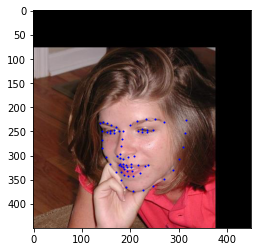

In [19]:
from imutils import face_utils
import dlib
import cv2
# get landmarks from dlib
p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

capture = cv2.VideoCapture('resources/300W-3D/AFW/134212_1.jpg')
ret, frame = capture.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
rects = detector(gray, 0)
plt.imshow(gray)
rbg = frame[:,:,::-1]
for (i, rect) in enumerate(rects):
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    print(shape.size)
    print(shape)

    for (x,y) in shape:
                plt.plot(x,y,'bo', markersize=1)


In [ ]:
# show the image on matplotlib
capture = cv2.VideoCapture('resources/300W-3D/AFW/134212_1.jpg')
ret, frame = capture.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# draw the landmarks
for i in range(0, 68):
    x = int(landmarks[0, i])
    y = int(landmarks[1, i])
    cv2.circle(frame, (x, y), 1, (0, 0, 255), -1)
# draw the pitch, yaw, roll
cv2.putText(frame, 'pitch: ' + str(pitch), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
cv2.putText(frame, 'yaw: ' + str(yaw), (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
cv2.putText(frame, 'roll: ' + str(roll), (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
# draw axis

nose_x, nose_y = landmarks[0,32], landmarks[1,32]
# draw the nose in pink
cv2.circle(frame, (int(nose_x), int(nose_y)), 5, (255, 0, 255), -1)


plt.imshow(frame)


# show the image
# plt.imshow(frame)
plt.show()


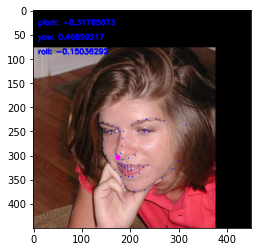

In [3]:
# show the image on matplotlib
capture = cv2.VideoCapture('resources/300W-3D/AFW/134212_1.jpg')
ret, frame = capture.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# draw the landmarks
for i in range(0, 68):
    x = int(landmarks[0, i])
    y = int(landmarks[1, i])
    cv2.circle(frame, (x, y), 1, (0, 0, 255), -1)
# draw the pitch, yaw, roll
cv2.putText(frame, 'pitch: ' + str(pitch), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
cv2.putText(frame, 'yaw: ' + str(yaw), (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
cv2.putText(frame, 'roll: ' + str(roll), (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
# draw axis

nose_x, nose_y = landmarks[0,32], landmarks[1,32]
# draw the nose in pink
cv2.circle(frame, (int(nose_x), int(nose_y)), 5, (255, 0, 255), -1)


plt.imshow(frame)


# show the image
# plt.imshow(frame)
plt.show()


In [7]:
# read_mat function to return pitch, yaw, roll
def read_mat(path):
    # remove the .jpg extension
    path = path.split('.jpg')[0]
    # add the .mat extension
    path = path + '.mat'
    data = sio.loadmat(path)
    landmarks = data['pt2d']
    labels = data['Pose_Para'][0][:3]
    pitch, yaw, roll = labels
    return landmarks, pitch, -yaw, roll

In [5]:
def show_image(path):
    capture = cv2.VideoCapture(path)
    ret, frame = capture.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # convert to RGB format for matplotlib
    
    landmarks, pitch, yaw, roll = read_mat(path)
    nose_x, nose_y = landmarks[0,32], landmarks[1,32]
    plt.imshow(frame)
    plt.show()

    capture.release()
    cv2.destroyAllWindows()

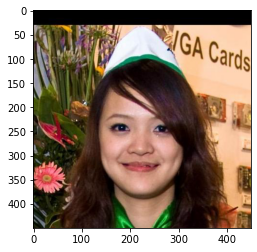

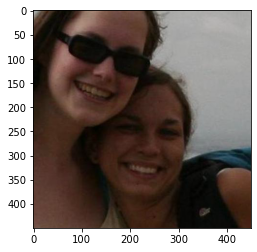

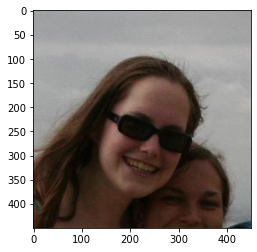

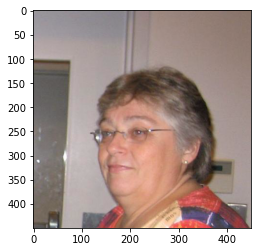

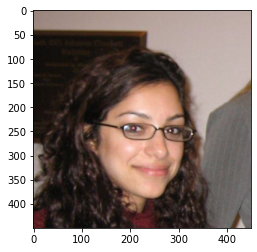

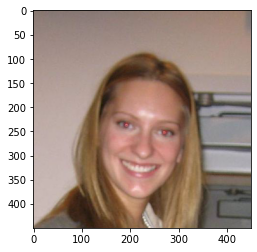

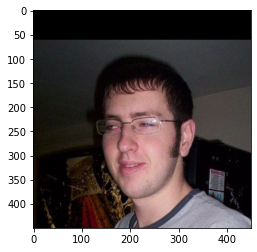

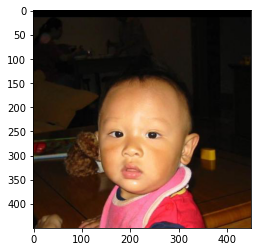

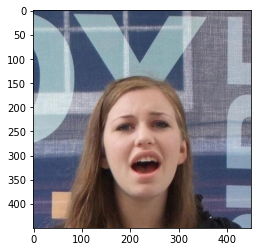

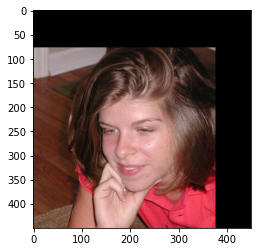

In [8]:
# collect all the image paths in a list
pathes_list = glob.glob('resources/300W-3D/*/*.jpg')
# loop through the list and show the image
for path in pathes_list[:10]:
    show_image(path)

# Permise 2
ignoring pervious attempt and just going with what we have as a model and use it to detect faces and adjust pictures to the model.

In [21]:
# import data from mat
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import dlib
import glob
from math import cos, sin
import os
# from PIL import image, ImageFilter
import pandas as pd
from imutils import face_utils
from xgboost import XGBRegressor


In [50]:
# load the model pickle
import pickle
model1 = pickle.load(open('resources/models/pitch_model.pkl', 'rb'))
model2 = pickle.load(open('resources/models/yaw_model.pkl', 'rb'))
model3 = pickle.load(open('resources/models/roll_model.pkl', 'rb'))

In [26]:
# read_mat function to return pitch, yaw, roll
def read_mat(path):
    # remove the .jpg extension
    path = path.split('.jpg')[0]
    # add the .mat extension
    path = path + '.mat'
    data = sio.loadmat(path)
    landmarks = data['pt2d']
    labels = data['Pose_Para'][0][:3]
    pitch, yaw, roll = labels
    return landmarks, pitch, -yaw, roll

In [27]:
# draw the pose axis on the image, and return the image
# tdx, tdy are for the nose position in x, y
def draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size = 100):

    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

In [28]:
def show_image(path):
    capture = cv2.VideoCapture(path)
    ret, frame = capture.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # convert to RGB format for matplotlib
    
    landmarks, pitch, yaw, roll = read_mat(path)
    nose_x, nose_y = landmarks[0,32], landmarks[1,32]
    plt.imshow(draw_axis(frame, yaw, pitch, roll, nose_x, nose_y))
    plt.show()

    capture.release()
    cv2.destroyAllWindows()

In [73]:
# open camera cv and save the image
# wait for the camera to open
while not capture2.isOpened():
    capture2 = cv2.VideoCapture(0)
    cv2.waitKey(1000)
    print("Wait for the camera to open")
ret, frame = capture2.read()
cv2.imwrite('resources/test5.jpg', frame)
capture2.release()
cv2.destroyAllWindows()


Wait for the camera to open


(450, 450, 3)
(2, 68)
[[149 138 127 119 118 127 143 166 195 226 259 287 309 327 339 349 360 175
  192 213 234 251 275 299 321 339 346 255 248 241 234 206 216 226 239 252
  189 203 216 225 212 199 279 295 308 317 303 290 182 199 214 222 232 246
  260 237 220 210 202 190 189 211 219 229 252 225 216 208]
 [125 152 180 211 242 269 292 309 320 325 322 315 301 281 258 234 210 106
   95  94 101 114 127 129 136 150 171 140 152 162 174 193 200 206 208 210
  128 126 130 140 138 134 160 158 165 177 174 168 233 227 226 232 235 246
  264 267 261 257 252 244 234 238 242 246 260 249 245 241]]
216 200


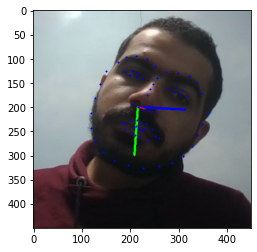

In [92]:
from imutils import face_utils
import dlib
import cv2
# get landmarks from dlib
p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

path = 'resources/test6.jpg'
# path = 'resources/300W-3D/AFW/134212_1.jpg'
capture = cv2.VideoCapture(path)
ret, frame = capture.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
gray = cv2.resize(gray,(450,450))
print(gray.shape)
rects = detector(gray, 1)
# plt.imshow(gray)
rbg = frame[:,:,::-1]

# store the landmarks in a numpy array
landmarks = np.zeros((68, 2), dtype=int)

for (i, rect) in enumerate(rects):
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    # print(shape.shape)
    # print(shape)
    
    for (x,y) in shape:
                plt.plot(x,y,'bo', markersize=1)

landmarks = shape.T
print(landmarks.shape)
print(landmarks)
nose_x, nose_y = landmarks[0,32], landmarks[1,32]
print(nose_x, nose_y)
landmarks_ = landmarks.reshape(1, -1)
pitch_pred = model1.predict(landmarks_)
yaw_pred = model2.predict(landmarks_)
roll_pred = model3.predict(landmarks_)
plt.imshow(draw_axis(gray, yaw_pred, pitch_pred, roll_pred, nose_x, nose_y))
plt.show()

In [103]:
%pylab inline
from IPython.display import clear_output
from imutils import face_utils
import dlib
import cv2
# get landmarks from dlib
p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

path = 'resources/test6.jpg'
# path = 'resources/300W-3D/AFW/134212_1.jpg'
capture = cv2.VideoCapture(0)

while capture.isOpened():
    ret, frame = capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    gray = cv2.resize(gray,(450,450))
    # print(gray.shape) #1
    rects = detector(gray, 1)
    # plt.imshow(gray)
    rbg = frame[:,:,::-1]

    # store the landmarks in a numpy array
    landmarks = np.zeros((68, 2), dtype=int)

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        # print(shape.shape)
        # print(shape)
        
        for (x,y) in shape:
                    plt.plot(x,y,'bo', markersize=1)

    landmarks = shape.T
    # print(landmarks.shape) #1
    # print(landmarks) #1
    nose_x, nose_y = landmarks[0,33], landmarks[1,33]
    # print(nose_x, nose_y) #1
    landmarks_ = landmarks.reshape(1, -1)
    pitch_pred = model1.predict(landmarks_)
    yaw_pred = model2.predict(landmarks_)
    roll_pred = model3.predict(landmarks_)
    plt.imshow(draw_axis(gray, yaw_pred, pitch_pred, roll_pred, nose_x, nose_y))
    plt.show()
    clear_output(wait=True)

KeyboardInterrupt: 

136
[[142 250]
 [141 267]
 [142 285]
 [150 302]
 [159 318]
 [170 334]
 [181 350]
 [191 366]
 [206 374]
 [226 372]
 [248 362]
 [269 348]
 [289 330]
 [302 308]
 [309 282]
 [313 254]
 [315 226]
 [137 233]
 [143 230]
 [152 233]
 [161 237]
 [171 240]
 [199 237]
 [215 229]
 [233 224]
 [252 224]
 [270 230]
 [185 250]
 [183 265]
 [181 281]
 [179 296]
 [172 300]
 [178 305]
 [186 308]
 [196 304]
 [207 300]
 [152 251]
 [158 249]
 [166 248]
 [177 250]
 [167 253]
 [159 254]
 [216 249]
 [224 246]
 [235 247]
 [247 248]
 [235 251]
 [225 251]
 [176 319]
 [179 318]
 [185 318]
 [192 320]
 [201 318]
 [217 319]
 [237 320]
 [220 336]
 [205 343]
 [196 343]
 [188 341]
 [181 334]
 [180 322]
 [186 323]
 [193 324]
 [201 323]
 [230 322]
 [203 331]
 [194 331]
 [187 328]]


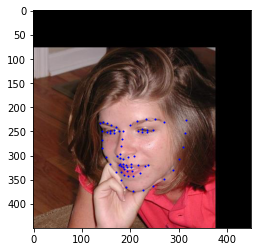

In [30]:
from imutils import face_utils
import dlib
import cv2
# get landmarks from dlib
p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

capture = cv2.VideoCapture('resources/300W-3D/AFW/134212_1.jpg')
ret, frame = capture.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
rects = detector(gray, 0)
plt.imshow(gray)
rbg = frame[:,:,::-1]
for (i, rect) in enumerate(rects):
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    print(shape.size)
    print(shape)

    for (x,y) in shape:
                plt.plot(x,y,'bo', markersize=1)
